<a href="https://colab.research.google.com/github/wilferalexander/-robot_trading-/blob/main/La_esencia_del_cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **La Esencia del cliente**

Para este proyecto utilizaremos el siguiente dataset de kaggle

https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart/data

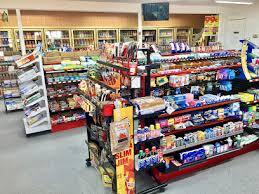

PREDECIR EL COSTE DE LAS CAMPAÑAS EN LOS MEDIOS DE COMUNICACIÓN EN FOOD MART DE EE.UU.
EN BASE A LOS INGRESOS DE 60K CLIENTES, PRODUCTO, PROMOCIÓN Y CARACTERÍSTICAS DE LA TIENDA.
ACERCA DE FOODMART:

Food Mart (CFM) es una cadena de tiendas de conveniencia de Estados Unidos. La sede de la empresa privada se encuentra en Mentor, Ohio, y en la actualidad hay aproximadamente 325 tiendas ubicadas en los EE.UU.. Convenient Food Mart opera mediante el sistema de franquicia.

En 1988, Food Mart era la tercera cadena de tiendas de conveniencia del país.

La bolsa NASDAQ dejó de cotizar en Convenient Food Mart ese mismo año al no cumplir la empresa los requisitos de información financiera.

Carden & Cherry hizo publicidad de Convenient Food Mart con el personaje Ernest en la década de 1980.

Los pasos sugeridos para solucionar este desafío, los enumeramos a continuación:

1. **Configuración del ambiente:**

2. **Obtención y transformación de los datos:**

3. **Exploración de los datos:**

4. **Preprocesamiento y obtención de features:**

5. **Validación de los clusters:**

6. **Análisis e interpretación de clusters:**


# **1. Configuración del Ambiente**

In [1]:
#debemos conectar nuestro colab a google drive para buscar el dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importamos las librerias necesarias
# linear algebra
import pandas as pd
import datetime
import numpy as np

#configurar opciones de visualización y para ignorar las advertencias
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
#biblioteca para visualizar datos faltantes
import missingno as msno
import plotly.express as px

import matplotlib as mlb
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

#Algoritmos
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


from IPython.display import display
import os
plt.style.use("seaborn")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',None)# set_option()display.max_rows aumenta el número de filas en la vista previa  del DataFrame
pd.set_option('display.max_columns',None) # set_option()display.max_columns aumenta el número de columnas en la vista previa  del

#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

#  **2. Recolección y Limpieza de datos**


Los datos recogidos pueden contener errores, valores perdidos, o pueden estar en un formato que no es fácilmente utilizable. Por eso, el proceso de limpieza de los datos es esencial para garantizar la calidad de los datos y la eficacia de los análisis posteriores. Este paso puede implicar eliminar duplicados, tratar con valores nulos, y corregir inconsistencias en los datos.

en este caso tambien traduciremos el dataset para una mejor comprensión



   Como el dataset original está en inglés, lo vas a dejar todo en español para que puedas tener una mejor comprensión del mismo.

In [3]:
#Cargamos el dataset
df_cost = pd.read_csv('/content/drive/MyDrive/Alura/Ciencias_de_datos/Challange/La esencia del cliente 1/media prediction and its cost.csv/media prediction and its cost.csv')
df_cost.head(3)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.7,17.7,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.7,17.7,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.7,17.7,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16


In [4]:
categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}

tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

miembro = {
    'Bronze':'Bronce',
    'Golden': 'Oro',
    'Silver':'Plata'
}

ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

pais = {
    'USA':'Estados Unidos',
    'Mexico':'México',
    'Canada':'Canadá'
}

estado_civil = {
    'S':'Soltero', 'M':'Casado'
}

genero ={
    'F':'Femenino',
    'M':'Masculino'
}

vivienda_propia={'Y':'Sí', 'N':'No'}

ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}



comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}


divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}

columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda',
    'store_cost(in millions)': 'costo_tienda',
    'unit_sales(in millions)': 'ventas_unitarias',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'miembro',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox)',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}


El datset original esta en ingles procederemos a dejar todo en español tanto columnas como filas

In [5]:
# Renombramos las  columnas según el diccionario 'columnas' y crcramos  un nuevo DataFrame al que llamamos df_traducido
df_traducido = df_cost.rename(columns=columnas).copy()

In [6]:
# Ahora, renombramos  las filas utilizando el diccionario por cada columna
df_traducido.categoria_alimento.drop_duplicates()
df_traducido['categoria_alimento'] = df_traducido['categoria_alimento'].replace(categoria_alimento)
df_traducido['departamento'] = df_traducido['departamento'].replace(departamento)
df_traducido['tipo'] = df_traducido['tipo'].replace(tipo)
df_traducido['promocion'] = df_traducido['promocion'].replace(promocion)
df_traducido['miembro'] = df_traducido['miembro'].replace(miembro)
df_traducido['ocupacion'] = df_traducido['ocupacion'].replace(ocupacion)
df_traducido['pais'] = df_traducido['pais'].replace(pais)
df_traducido['estado_civil'] = df_traducido['estado_civil'].replace(estado_civil)
df_traducido['genero'] = df_traducido['genero'].replace(genero)
df_traducido['vivienda_propia'] = df_traducido['vivienda_propia'].replace(vivienda_propia)
df_traducido['ingreso_anual'] = df_traducido['ingreso_anual'].replace(ingreso_anual)
df_traducido['comercio'] = df_traducido['comercio'].replace(comercio)
df_traducido['divulgacion'] = df_traducido['divulgacion'].replace(divulgacion)
df_traducido['escolaridad'] = df_traducido['escolaridad'].replace(escolaridad)


# **3 Exploración de los datos**

realizaremos varios analisis y validando algunas columnas para entender y comprender mejor nuestros datos

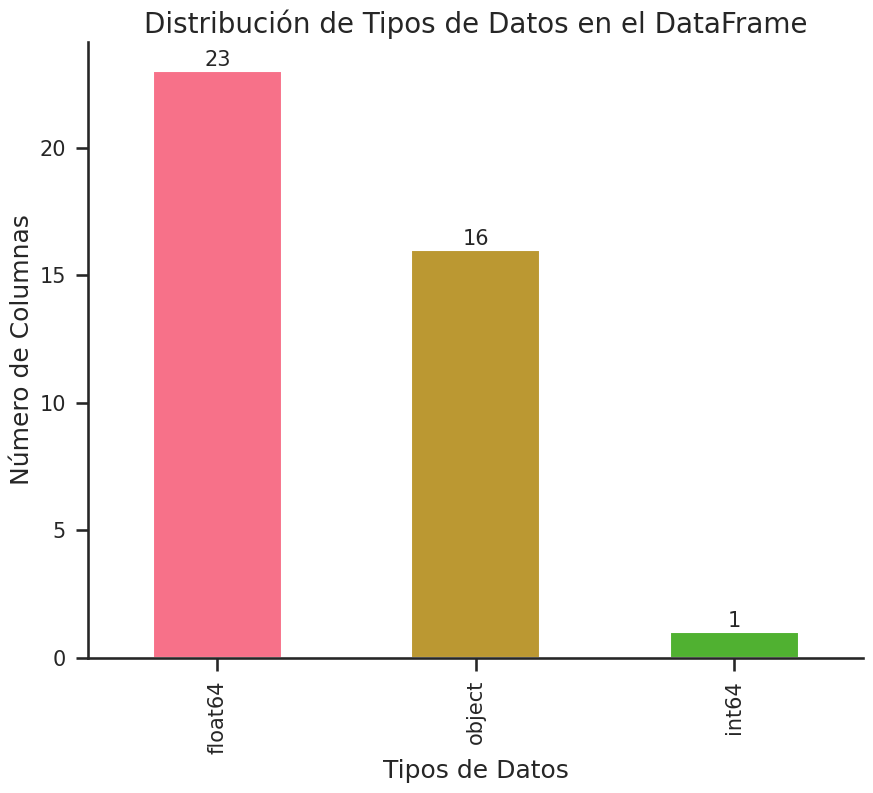

In [7]:
# Establecemos el estilo de Seaborn
sns.set(style="ticks", context="talk", font_scale=1, palette="husl")

# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))

# contamos los tipos de datos y crea un gráfico de barras
ax = df_traducido.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)

# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)

# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)

# Eliminamos los bordes desagradables
sns.despine()

# Mostramos el gráfico
plt.show()


**Objetivo** Ver gráficamente como están distribuidos nuestros datos y lograr identificar el tipo de dato que estamos manejando

>

**Resultado** Logramos ver que tenemos en total de 24 variables numéricas y 16 categóricas

In [9]:
#Información de los datos del dataset
print("Número de filas: ",df_traducido.shape[0])
print("Número de Columnas:",df_traducido.shape[1])
print("Datos Duplicados",df_traducido.duplicated().sum())
print("Variables Categóricas: ",df_traducido.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_traducido.select_dtypes(exclude='object').shape[1])

Número de filas:  60428
Número de Columnas: 40
Datos Duplicados 0
Variables Categóricas:  16
Variables Numéricas:  24


Nuestros datos están divididos en 60428  filas 40 columnas no tenemos datos duplicados, tenemos 16 variables categóricas, y 24 numéricas las cuales son importantes al final para construir nuestro modelo

In [10]:
#datos nulos por columna
df_traducido.isnull().sum().sort_values(ascending=False)

categoria_alimento            0
departamento                  0
peso_neto                     0
empaque_reciclable            0
bajo_en_grasa                 0
unidades_por_caja             0
comercio                      0
ciudad                        0
estado                        0
pies_cuadrados_tienda         0
pies_cuadrados_comestibles    0
pies_cuadrados_congelados     0
pies_cuadrados_carne          0
cafeteria                     0
tienda_de_videos              0
barra_de_ensaladas            0
comida_preparada              0
floristeria                   0
divulgacion                   0
peso_bruto                    0
precio_recomendado            0
marca                         0
genero                        0
tipo                          0
ventas_tienda                 0
costo_tienda                  0
ventas_unitarias              0
promocion                     0
pais                          0
estado_civil                  0
total_de_hijos                0
promedio

**Objetivo:** Identificar si tenemos valores nulos en el dataset

>


**Resultado:** Para nuestro set de datos no encontramos valores nulos

In [11]:
#Estadística Descriptiva de los Datos
df_traducido.describe()

,ventas_tienda,costo_tienda,ventas_unitarias,total_de_hijos,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,costo
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,58312.371748,0.829351,2.200271,2.115258,13.806433,11.796289,0.558665,0.350434,18.860694,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,36093.954105,1.303424,1.109644,0.932829,4.622693,4.682986,0.496551,0.477110,10.258555,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,20000.000000,0.000000,0.000000,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,40000.000000,0.000000,1.000000,1.410000,9.700000,7.710000,0.000000,0.000000,10.000000,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,40000.000000,0.000000,2.000000,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,80000.000000,1.000000,3.000000,2.790000,17.700000,16.000000,1.000000,1.000000,28.000000,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,160000.000000,5.000000,4.000000,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [12]:
#Identificar los valores unicos por columna
df_traducido.nunique()

categoria_alimento              45
departamento                    22
tipo                             3
ventas_tienda                 1033
costo_tienda                  9919
ventas_unitarias                 6
promocion                       48
pais                             3
estado_civil                     2
genero                           2
total_de_hijos                   6
escolaridad                      5
miembro                          4
ocupacion                        5
vivienda_propia                  2
promedio_autos(aprox)            5
ingreso_anual                    8
numero_hijos                     6
promedio_autos(aprox)            5
marca                          111
precio_recomendado             315
peso_bruto                     376
peso_neto                      332
empaque_reciclable               2
bajo_en_grasa                    2
unidades_por_caja               36
comercio                         5
ciudad                          19
estado              

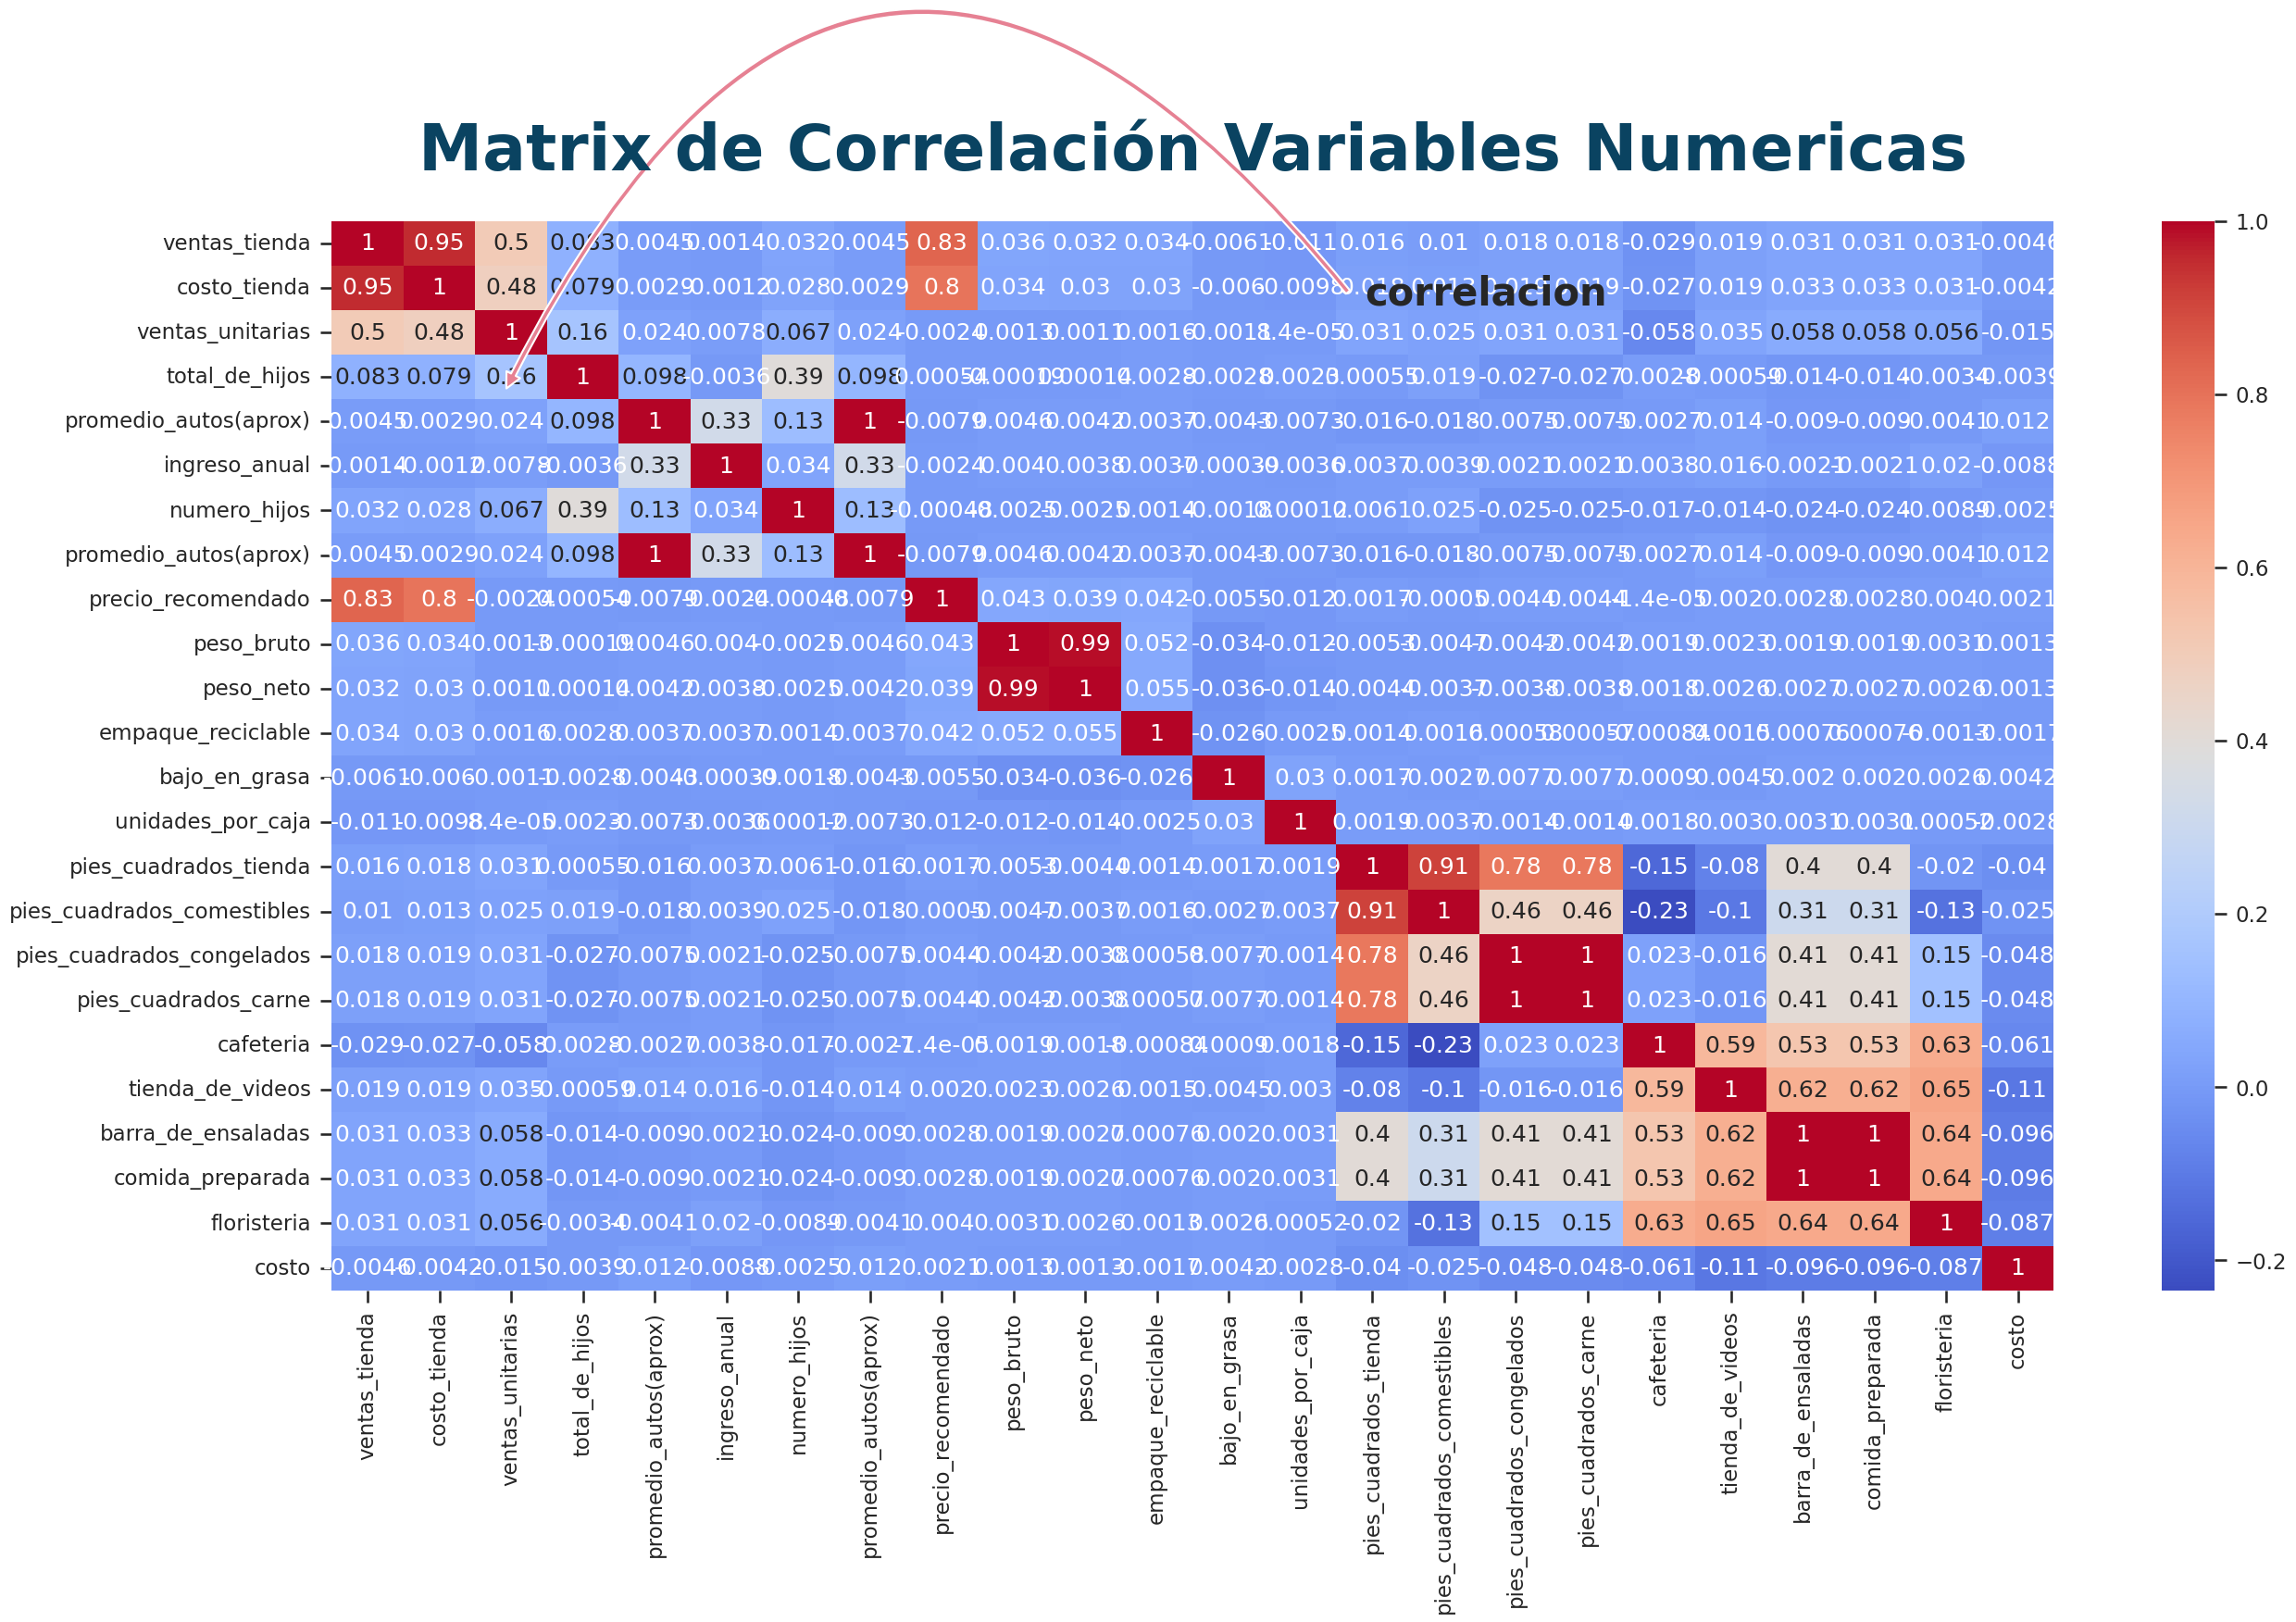

In [13]:
#Correlación Entre Variables Numéricas
corr=df_traducido.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#Configuramos las etiquetas del eje y con los nombres de las columnas del DataFrame.
ax.set_yticklabels(df_traducido.corr(), rotation = 0)
ax.set_xticklabels(df_traducido.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#Añadimos una anotacion indicando una correlación
ax.annotate('correlacion',
                    fontsize=30,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025,
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Matrix de Correlación Variables Numericas', size = 50, color = theme[3], weight='bold', pad=40);
plt.show()


In [15]:
# Seleccionamos solo las variables categóricas
df_var_cat = df_traducido.select_dtypes(include='object')

# mostramos información sobre el nuevo DataFrame
df_var_cat.head()

,categoria_alimento,departamento,tipo,promocion,pais,estado_civil,genero,escolaridad,miembro,ocupacion,vivienda_propia,marca,comercio,ciudad,estado,divulgacion
0,Alimentos para el desayuno,Alimentos congelados,Comida,Bolsas llenas,Estados Unidos,Casado,Femenino,Primaria,Normal,Técnico,Sí,Carrington,Supermercado de lujo,Salem,OR,"Periódico diario, radio"
1,Alimentos para el desayuno,Alimentos congelados,Comida,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,Superior,Plata,Profesional,Sí,Carrington,Supermercado de lujo,Salem,OR,"Periódico diario, radio"
2,Alimentos para el desayuno,Alimentos congelados,Comida,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,Primaria,Normal,Obrero,No,Carrington,Supermercado de lujo,Salem,OR,"Periódico diario, radio"
3,Alimentos para el desayuno,Alimentos congelados,Comida,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,Secundaria,Bronce,Obrero,Sí,Carrington,Supermercado de lujo,Salem,OR,Cupón en la tienda
4,Alimentos para el desayuno,Alimentos congelados,Comida,Venta Doble,Estados Unidos,Casado,Masculino,Primaria,Bronce,Técnico,No,Golden,Supermercado de lujo,Salem,OR,Radio



Columnas y descripción:

Podemos determinar algunas variables importantes para mejorar la experiencia de nuestros clientes


1.   Categoría de Alimento (categoria_alimento):
2.   Tipo de Producto (tipo):
3.   Promoción (promocion):
4.   Estado Civil (estado_civil):
5.   Número de Hijos (total_de_hijos, numero_hijos):
6.   Escolaridad (escolaridad):
7.   Ocupación (ocupacion):
8.   Ingreso Anual (ingreso_anual):
9.   Género (genero):
10.  Ciudad (ciudad), Estado (estado):
11.  Comercio (comercio):
12.  Historial de Compras (ventas_tienda,          costo_tienda, ventas_unitarias):
13.  Pies Cuadrados de la Tienda (pies_cuadrados_tienda, pies_cuadrados_comestibles,pies_cuadrados_congelados, pies_cuadrados_carne):
14.  Divulgación (divulgacion):



















In [16]:
# Agrupamos y sumamos las ventas por país
datos = df_traducido.groupby("pais")[["ventas_tienda"]].sum().sort_values(by=['ventas_tienda'], ascending=[False]).reset_index()

# Calcula el porcentaje de cada valor con respecto al total y redondea a dos decimales
datos['porcentaje'] = datos['ventas_tienda'] / datos['ventas_tienda'].sum() * 100
datos['porcentaje'] = datos['porcentaje'].round(2).astype(str) + '%'

# Crea el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos, x='pais', y='ventas_tienda', color='pais',
             text='porcentaje',  # Usa el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='v')  # Cambié la orientación a horizontal ('h')

# Configuración adicional del diseño
fig.update_layout(title='ventas_tienda',
                  xaxis_title='País',
                  yaxis_title='ventas_tienda',
                  legend_title='País')

# Muestra el gráfico
fig.show(renderer="colab")


**Objetivos**

1.   Identificar los países con más ventas unitarias

**Resultado**


1.   Identificamos que Estados unidos es el país con más ventas unitarias genera con un 64 %  de la participación seguido México con un 29.2 %  y candada en un menor porcentaje con 6.65

**Conclusiones**

se podría determinar que podemos enfocarnos en el mercado en Canadá ya que es un nicho para poder incrementar las ventas






In [18]:
# Realizar el conteo de valores
conteo = df_traducido.groupby(['miembro', 'pais']).size().reset_index(name='conteo')

conteo['porcentaje'] = conteo.groupby('miembro')['conteo'].transform(lambda x: (x / x.sum()) * 100)
conteo['porcentaje'] = conteo['porcentaje'].round(2).astype(str) + '%'



# Crear el gráfico de barras
fig = px.bar(conteo, x='miembro', y='conteo',color='pais',
             text='porcentaje',
             title='Gráfico de Barras con Conteo')
color_discrete_sequence=px.colors.qualitative.Set3,

# Personalizar el diseño del gráfico
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(autosize=False, width=800, height=500)

# Mostrar el gráfico
fig.show()


**Objetivo** Identificar la cantidad de miembros por país

>

**Resultado**

evidenciamos que en la mayoría de países los clientes son miembros del club bronce

y podemos determinar el siguiente análisis


1.   Canadá En Bronce tiene una participación del 6%
2.   Estados Unidos 63 %
2.   México 29 %

La conclusión que podemos determinar acá es que es posible buscar en cada país aumentar el porcentaje de cliente que está en normal a bronce y los plata llevarlo a oro








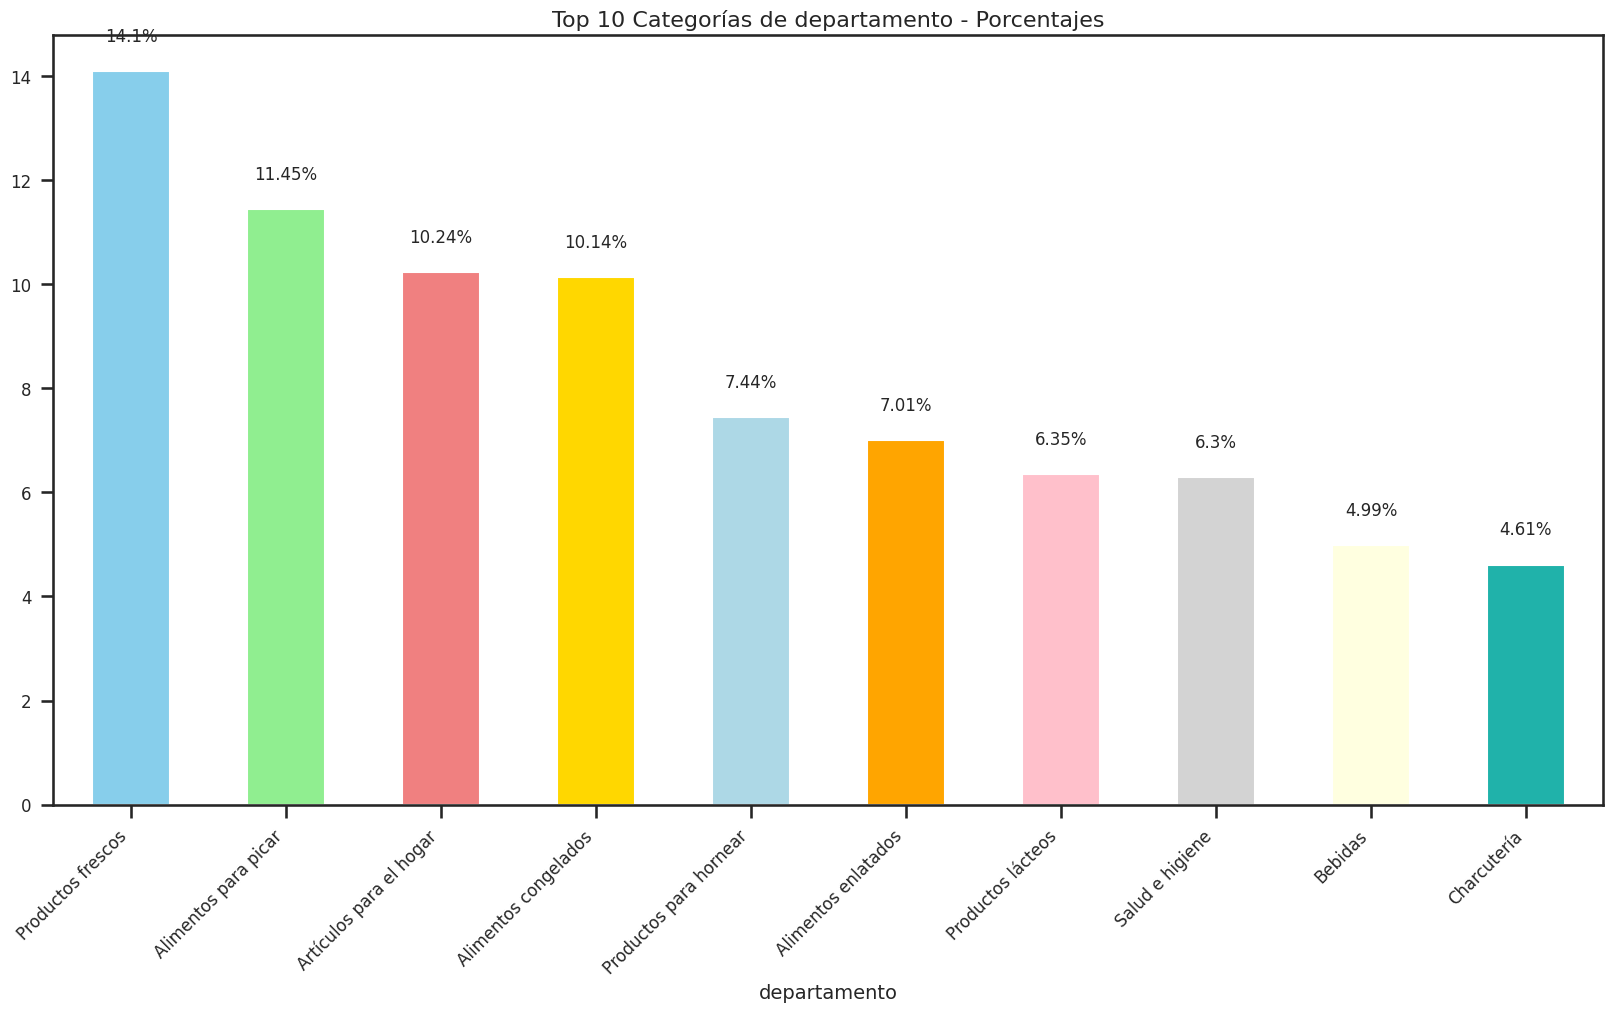

In [19]:
# Calcular porcentajes
def porcentajes_dep(departamento, df_traducido):
    plt.figure(figsize=(20, 10))

    # Calcular porcentajes
    porcentajes_dep = df_traducido[departamento].value_counts(normalize=True) * 100

    # Seleccionar las top 10 categorías
    top_20 = porcentajes_dep.head(10)

    # Definir una lista de colores para las barras
    colores = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightblue', 'orange', 'pink', 'lightgray', 'lightyellow', 'lightseagreen',
               'lightcyan', 'lightsteelblue', 'lightpink', 'lightsalmon', 'lightgoldenrodyellow', 'lightcyan', 'lightgreen', 'lightcoral', 'lightblue']

    # Crear un gráfico de barras
    grafico = top_20.plot(kind='bar', color=colores)

    # Configuraciones del gráfico
    plt.title(f'Top 10 Categorías de {departamento} - Porcentajes', fontsize=16)
    plt.xlabel(departamento, fontsize=14)
    plt.yticks(fontsize=12)

    # Agregar los porcentajes a las barras
    for p, label in zip(grafico.patches, top_20.index):
        height = p.get_height()
        width = p.get_x() + p.get_width() / 2.
        grafico.text(width, height + 0.5, f'{round(porcentajes_dep[label], 2)}%', ha='center', va='bottom', fontsize=12)

    # Girar las etiquetas del eje X
    grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Llama a la función porcentajes con la columna 'categoria_alimento'
porcentajes_dep('departamento', df_traducido)


**Objetivo:** Identificar el top 10 de los departamentos que más venden productos

**Resultado:**
Con esta grafica comprobamos el valor de la gráfica anterior donde los alimentos más comprados son los vegetales y nos da detalle que el departamento que más compran los clientes son productos frescos seguidos por alimentos para picar y artículos para el hogar, en esta grafica mostramos los 10 departamentos más significativos, y generando el de menos departamentos nos damos cuenta que productos congelados y productos de mar son los menos vendidos



In [20]:
# Agrupa y suma las ventas por escolaridad
datos = df_traducido.groupby("escolaridad")[["ventas_unitarias"]].sum().sort_values(by=['ventas_unitarias'], ascending=[False]).reset_index()

# Calcula el porcentaje de cada valor con respecto al total y redondea a dos decimales
datos['porcentaje'] = datos['ventas_unitarias'] / datos['ventas_unitarias'].sum() * 100
datos['porcentaje'] = datos['porcentaje'].round(2).astype(str) + '%'

# Crea el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos, x='escolaridad', y='ventas_unitarias', color='escolaridad',
             text='porcentaje',  # Usa el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='v')  # Cambié la orientación a horizontal ('h')

# Configuración adicional del diseño
fig.update_layout(title='Ventas Unitarias por escolaridad',
                  xaxis_title='escolaridad',
                  yaxis_title='Ventas Unitarias por escolaridad',
                  legend_title='escolaridad')

# Muestra el gráfico
fig.show(renderer="colab")

al ver esa grafica nos permite ver que la mayoría de compradores son estudiantes o menores de edad o personas que no terminaron sus estudios sería importante validar la edad de los compradores para identificar esta valor, lastimosamente en el dataset no contamos con los datos de la edad

In [21]:
# Agrupa y suma las ventas por miembro
datos = df_traducido.groupby("miembro")[["ventas_unitarias"]].sum().sort_values(by=['ventas_unitarias'], ascending=[False]).reset_index()

# Calcula el porcentaje de cada valor con respecto al total y redondea a dos decimales
datos['porcentaje'] = datos['ventas_unitarias'] / datos['ventas_unitarias'].sum() * 100
datos['porcentaje'] = datos['porcentaje'].round(2).astype(str) + '%'

# Crea el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos, x='miembro', y='ventas_unitarias', color='miembro',
             text='porcentaje',  # Usa el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='v')

# Configuración adicional del diseño
fig.update_layout(title='Ventas Unitarias por Miembro',
                  xaxis_title='miembro',
                  yaxis_title='Ventas Unitarias por Miembro',
                  legend_title='Miembro')

# Muestra el gráfico
fig.show(renderer="colab")

La mayoría de los clientes son Bronce lo que nos permite visualizar esta grafica es que podemos trabajar en los clientes normales para predecir o crear estrategias para llevarlos algún tipo de membresía

In [22]:
# Agrupa y suma las ventas por ocupacion
datos = df_traducido.groupby("ocupacion")[["ventas_unitarias"]].sum().sort_values(by=['ventas_unitarias'], ascending=[False]).reset_index()

# Calcula el porcentaje de cada valor con respecto al total y redondea a dos decimales
datos['porcentaje'] = datos['ventas_unitarias'] / datos['ventas_unitarias'].sum() * 100
datos['porcentaje'] = datos['porcentaje'].round(2).astype(str) + '%'

# Crea el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos, x='ocupacion', y='ventas_unitarias', color='ocupacion',
             text='porcentaje',  # Usa el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='v')

# Configuración adicional del diseño
fig.update_layout(title='Ventas Unitarias por ocupacion',
                  xaxis_title='ocupacion',
                  yaxis_title='Ventas Unitarias por ocupacion',
                  legend_title='ocupacion')

# Muestra el gráfico
fig.show(renderer="colab")

La mayoría de los clientes tienen un nivel educativo alto y técnico

In [23]:
# Agrupa y suma las ventas por estado_civil
datos = df_traducido.groupby("estado_civil")[["ventas_unitarias"]].sum().sort_values(by=['ventas_unitarias'], ascending=[False]).reset_index()

# Calcula el porcentaje de cada valor con respecto al total y redondea a dos decimales
datos['porcentaje'] = datos['ventas_unitarias'] / datos['ventas_unitarias'].sum() * 100
datos['porcentaje'] = datos['porcentaje'].round(2).astype(str) + '%'

# Crea el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos, x='estado_civil', y='ventas_unitarias', color='estado_civil',
             text='porcentaje',  # Usa el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='v')

# Configuración adicional del diseño
fig.update_layout(title='Ventas Unitarias por estado_civil',
                  xaxis_title='estado_civil',
                  yaxis_title='Ventas Unitarias por estado_civil',
                  legend_title='estado_civil')

# Muestra el gráfico
fig.show(renderer="colab")

este valor es más constante y no se evidencia una tendencia fuerte entre personas que esta casadas o solteras podría trabajarse en un análisis más detallado de pronto por tipo de producto  en que tipo de tiendas compran las personas según su estado civil

In [24]:
# Agrupa y suma las ventas por genero
datos = df_traducido.groupby("genero")[["ventas_unitarias"]].sum().sort_values(by=['ventas_unitarias'], ascending=[False]).reset_index()

# Calcula el porcentaje de cada valor con respecto al total y redondea a dos decimales
datos['porcentaje'] = datos['ventas_unitarias'] / datos['ventas_unitarias'].sum() * 100
datos['porcentaje'] = datos['porcentaje'].round(2).astype(str) + '%'

# Crea el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos, x='genero', y='ventas_unitarias', color='genero',
             text='porcentaje',  # Usa el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='v')

# Configuración adicional del diseño
fig.update_layout(title='Ventas Unitarias por genero',
                  xaxis_title='genero',
                  yaxis_title='Ventas Unitarias por genero',
                  legend_title='genero')

# Muestra el gráfico
fig.show(renderer="colab")

Esta grafica nos deja ver que la tendencia es que las mujeres son las que más compran aunque los hombres se encuentran cerca de este valor

In [25]:
# Agrupa y suma las ventas por vivienda_propia
datos = df_traducido.groupby("vivienda_propia")[["ventas_unitarias"]].sum().sort_values(by=['ventas_unitarias'], ascending=[False]).reset_index()

# Calcula el porcentaje de cada valor con respecto al total y redondea a dos decimales
datos['porcentaje'] = datos['ventas_unitarias'] / datos['ventas_unitarias'].sum() * 100
datos['porcentaje'] = datos['porcentaje'].round(2).astype(str) + '%'

# Crea el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos, x='vivienda_propia', y='ventas_unitarias', color='vivienda_propia',
             text='porcentaje',  # Usa el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='v')

# Configuración adicional del diseño
fig.update_layout(title='Ventas Unitarias por vivienda_propia',
                  xaxis_title='vivienda_propia',
                  yaxis_title='Ventas Unitarias por vivienda_propia',
                  legend_title='vivienda_propia')

# Muestra el gráfico
fig.show(renderer="colab")

Este grafico es interesante ya que nos refleja que un gran porcentaje de clientes son propietarios de sus casas

In [26]:
# Agrupa y suma las ventas por ingreso_anual
datos = df_traducido.groupby("ingreso_anual")[["ventas_unitarias"]].sum().sort_values(by=['ventas_unitarias'], ascending=[False]).reset_index()

# Calcula el porcentaje de cada valor con respecto al total y redondea a dos decimales
datos['porcentaje'] = datos['ventas_unitarias'] / datos['ventas_unitarias'].sum() * 100
datos['porcentaje'] = datos['porcentaje'].round(2).astype(str) + '%'

# Crea el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos, x='ingreso_anual', y='ventas_unitarias', color='ingreso_anual',
             text='porcentaje',  # Usa el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='v')

# Configuración adicional del diseño
fig.update_layout(title='Ventas Unitarias por ingreso_anual',
                  xaxis_title='ingreso_anual',
                  yaxis_title='Ventas Unitarias por ingreso_anual',
                  legend_title='ingreso_anual')

# Muestra el gráfico
fig.show(renderer="colab")

Este es un dato interesante ya que lo que nos permite observar es que 32% de los clientes tiene un salario de 40000 dólares al año, lo que evidencia que las personas de clase media o técnicos son los que más compran en esta tienda, y entre más altos los salarios el porcentaje de compra es menor, sería interesante ver el ingreso de los cliente comparado con su membresía

In [27]:
# Agrupa y suma las ventas por comercio
datos = df_traducido.groupby("comercio")[["ventas_unitarias"]].sum().sort_values(by=['ventas_unitarias'], ascending=[False]).reset_index()

# Calcula el porcentaje de cada valor con respecto al total y redondea a dos decimales
datos['porcentaje'] = datos['ventas_unitarias'] / datos['ventas_unitarias'].sum() * 100
datos['porcentaje'] = datos['porcentaje'].round(2).astype(str) + '%'

# Crea el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos, x='comercio', y='ventas_unitarias', color='comercio',
             text='porcentaje',  # Usa el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='v')

# Configuración adicional del diseño
fig.update_layout(title='Ventas Unitarias por comercio',
                  xaxis_title='comercio',
                  yaxis_title='Ventas Unitarias por comercio',
                  legend_title='comercio')

# Muestra el gráfico
fig.show(renderer="colab")

Esta grafica es impórtate porque nos permite entender que el tipo de comercio los clientes prefieren el típico supermercado y algunos de lujo, esto nos da para jugar con otra métricas como nivel de educación y que tipo de comercios compran


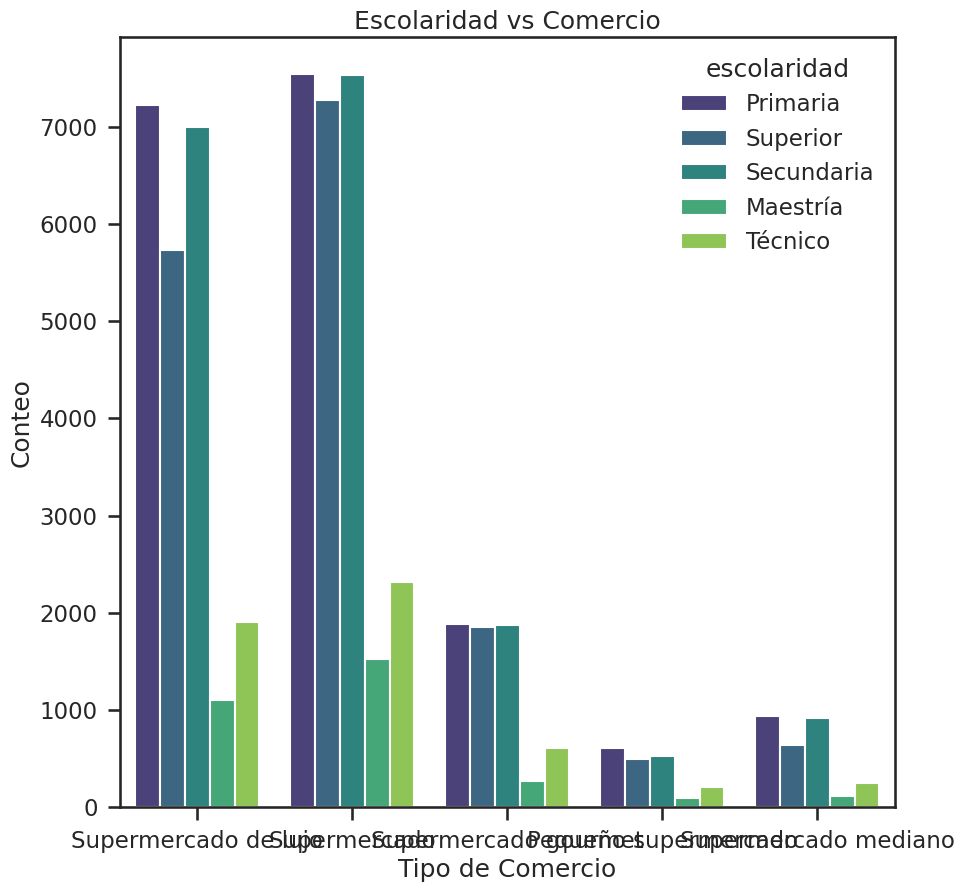

In [28]:
# Crear un gráfico de barras con seaborn (countplot)
plt.figure(figsize=(10, 10))
sns.countplot(x='comercio', hue='escolaridad', data=df_traducido, palette='viridis')
plt.title('Escolaridad vs Comercio')
plt.xlabel('Tipo de Comercio')
plt.ylabel('Conteo')
plt.show()


In [29]:
# Agrupa y suma las ventas por numero_hijos
datos = df_traducido.groupby("numero_hijos")[["ventas_unitarias"]].sum().sort_values(by=['ventas_unitarias'], ascending=[False]).reset_index()

# Calcula el porcentaje de cada valor con respecto al total y redondea a dos decimales
datos['porcentaje'] = datos['ventas_unitarias'] / datos['ventas_unitarias'].sum() * 100
datos['porcentaje'] = datos['porcentaje'].round(2).astype(str) + '%'

# Crea el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos, x='numero_hijos', y='ventas_unitarias', color='numero_hijos',
             text='porcentaje',  # Usa el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='v')

# Configuración adicional del diseño
fig.update_layout(title='Ventas Unitarias por numero_hijos',
                  xaxis_title='numero_hijos',
                  yaxis_title='Ventas Unitarias por numero_hijos',
                  legend_title='numero_hijos')

# Muestra el gráfico
fig.show(renderer="colab")

Esta grafica nos deja ver que entre menos hijos las compras son mayores lo que noa puede llevar a deducir que son personas que no casadas o son casadas y con hijos


In [30]:
# Agrupa y suma las ventas por divulgacion
datos = df_traducido.groupby("divulgacion")[["costo"]].sum().sort_values(by=['costo'], ascending=[False]).reset_index()

# Calcula el porcentaje de cada valor con respecto al total y redondea a dos decimales
datos['porcentaje'] = datos['costo'] / datos['costo'].sum() * 100
datos['porcentaje'] = datos['porcentaje'].round(2).astype(str) + '%'

# Crea el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos, x='divulgacion', y='costo', color='divulgacion',
             text='porcentaje',  # Usa el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='v')

# Configuración adicional del diseño
fig.update_layout(title='Costo x Divulgacion',
                  xaxis_title='divulgacion',
                  yaxis_title='Costo x Divulgacion',
                  legend_title='divulgacion')

# Muestra el gráfico
fig.show(renderer="colab")

como vemos que los datos están limpios no tenemos que hacer ninguna accion para manejarlos

utilizando Plotly Express para crear un gráfico de barras que muestra las ventas unitarias  por categoría de alimento, con colores distintos para cada categoría. La función groupby se utiliza para agrupar los datos por 'categoria_alimento', luego se suman las ventas unitarias en millones para cada categoría, se ordenan en orden descendente y se reinicia el índice.

# **4. Identificando los features**


Codificación de las variables categóricas

Experiencia de Compra Personalizada

Para obtener una experiencia de compra más personalizada, rápida y efectiva, es crucial analizar diversas variables que puedan proporcionar información valiosa sobre el comportamiento y las preferencias de los clientes.

  

In [31]:
#Información de los datos
print("Número de filas: ",df_traducido.shape[0])
print("Número de Columnas:",df_traducido.shape[1])
print("Datos Duplicados",df_traducido.duplicated().sum())
print("Variables Categóricas: ",df_traducido.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_traducido.select_dtypes(exclude='object').shape[1])

Número de filas:  60428
Número de Columnas: 40
Datos Duplicados 0
Variables Categóricas:  16
Variables Numéricas:  24


In [32]:
columnas_categoricas=[
 'tipo',
 'genero',
 'miembro',
 'estado_civil',
 'pais',
 'ocupacion',
 'escolaridad']

In [33]:
columnas_numericas= [
 'ventas_tienda',
 'ingreso_anual',
 'numero_hijos',
 'precio_recomendado',
 'peso_neto',
 'pies_cuadrados_comestibles',
 'pies_cuadrados_congelados',
 'empaque_reciclable',
 'bajo_en_grasa',
 'unidades_por_caja',
 'cafeteria',
 'tienda_de_videos',
 'comida_preparada',
 'floristeria'
 ]

Después de analizar las variables categóricas  creo que para el análisis que vamos a realizar posteriormente no es necesario tener las siguientes
marca
categoria_alimento
promoción
marca
estado

las cuales la eliminare del dataset y creare una copia del dataset para no afectar el dataset original


In [34]:
df_dummy = pd.get_dummies(df_traducido[columnas_categoricas], columns=columnas_categoricas)
df_final = pd.concat([df_traducido[columnas_numericas],df_dummy], axis = 1)
df_final.sample(3)

,ventas_tienda,ingreso_anual,numero_hijos,precio_recomendado,peso_neto,pies_cuadrados_comestibles,pies_cuadrados_congelados,empaque_reciclable,bajo_en_grasa,unidades_por_caja,cafeteria,tienda_de_videos,comida_preparada,floristeria,tipo_Bebida,tipo_Comida,tipo_No comestible,genero_Femenino,genero_Masculino,miembro_Bronce,miembro_Normal,miembro_Oro,miembro_Plata,estado_civil_Casado,estado_civil_Soltero,pais_Canadá,pais_Estados Unidos,pais_México,ocupacion_Cargo de Oficina,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico,escolaridad_Maestría,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico
14803,3.75,20000,0.0,1.25,6.02,16418.0,4016.0,0.0,0.0,20.0,1.0,1.0,1.0,1.0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0
7384,5.80,60000,1.0,2.90,10.50,24390.0,9184.0,0.0,1.0,11.0,0.0,0.0,1.0,0.0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
52708,6.42,40000,0.0,2.14,5.89,22063.0,4923.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [35]:
#Información de los datos
print("Variables Categóricas: ",df_final.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_final.select_dtypes(exclude='object').shape[1])

Variables Categóricas:  0
Variables Numéricas:  38


One-hot encoding para variables categóricas.
Estandarización de variables numéricas.
Creación de segmentaciones.
Evaluación de la calidad de la clusterización utilizando las métricas solicitadas y una baseline generada con números aleatorios.



La codificación de variables categóricas es crucial en la fase de preparación de datos para modelos de clustering. utilizaremos  el método de one-hot encoding y estableciendo valores numéricos para una variable categórica.
One-Hot Encoding

después de haber codificado las variables categóricas, es importante reemplazar los valores originales en el conjunto de datos con las nuevas representaciones numéricas. Esto asegura que el modelo de clustering trabaje con los datos codificados.

In [36]:
from sklearn.preprocessing import OneHotEncoder
# Creamos un DataFrame con las columnas categóricas
df_categorica = df_traducido[columnas_categoricas]
# Instanciamos el OneHotEncoder
encoder = OneHotEncoder()

# Ajustamos y transformamos el codificador en las columnas categóricas.
df_encoded_array = encoder.fit_transform(df_categorica).toarray()

# Creamos el DataFrame con las columnas codificadas
df_encoded = pd.DataFrame(df_encoded_array, columns=encoder.get_feature_names_out(columnas_categoricas))

# Concatenamos el DataFrame codificado con el DataFrame original
df_final_encoded = pd.concat([df_traducido[columnas_numericas], df_encoded], axis=1)

df_final_encoded.sample(3)


,ventas_tienda,ingreso_anual,numero_hijos,precio_recomendado,peso_neto,pies_cuadrados_comestibles,pies_cuadrados_congelados,empaque_reciclable,bajo_en_grasa,unidades_por_caja,cafeteria,tienda_de_videos,comida_preparada,floristeria,tipo_Bebida,tipo_Comida,tipo_No comestible,genero_Femenino,genero_Masculino,miembro_Bronce,miembro_Normal,miembro_Oro,miembro_Plata,estado_civil_Casado,estado_civil_Soltero,pais_Canadá,pais_Estados Unidos,pais_México,ocupacion_Cargo de Oficina,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico,escolaridad_Maestría,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico
40060,15.52,60000,1.0,3.88,14.10,20141.0,6393.0,1.0,1.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
59283,6.39,20000,1.0,2.13,5.09,18670.0,5415.0,1.0,0.0,13.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
43866,6.93,40000,0.0,2.31,4.88,15337.0,5011.0,1.0,0.0,29.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Observamos que ya no tenemos variables categoricas y podemos ver que todas son númericas y podemos estandarizar los datos para aplicar los modelos


# **4.1 Estandarización de los datos**

Utilizaremos  StandardScaler de scikit-learn para estandarizar las características del DataFrame df_traducido_encoded.


In [37]:
x = df_final_encoded

# Instanciamos el StandardScaler
scaler = StandardScaler()

# Ajustamos y transformamos el scaler en las características
x_std = scaler.fit_transform(x)

# **5- Clusterización y Validación**

1. El algoritmo recomendado para la clusterización es KMeans, sin embargo, eres libre de utilizar cualquier otro algoritmo como Mean Shift o, incluso, DBSCAN. Lo importante es hallar el mejor número de clusters.

Validación

2. Número de clusters: Debes instanciar de 3 a máximo 10 clusters con el(los) algoritmo(s) seleccionado(s), utilizando X_std y obtener cómo mínimo el puntaje de Silhouette, aunque te recomiendo utilizar otras métricas como Davies-Bouldin y Calinski and Harabasz para que puedas decidir cuál es la mejor configuración para el número de clusters.

Restricciones: (El puntaje mínimo de Silhouette debe ser de 0.50; el de Davies-Bouldin máximo de 0.75; y el de CalinskiHarabasz, el número más alto posible.)

3. Estructura: Debes evaluar la estructura de los clusters tomando como referencia una baseline. Para generar la baseline, vamos a generar números aleatorios con el módulo random de numpy con las mismas dimensiones de tu dataset X_std y lo vas a almacenar en una variable llamada random_data y vas a repetir el paso 2. Analiza los puntajes da la(s) métrica(s) utilizada y asegúrate de que tu X_std tiene un desempeño muy superior al de random_data.

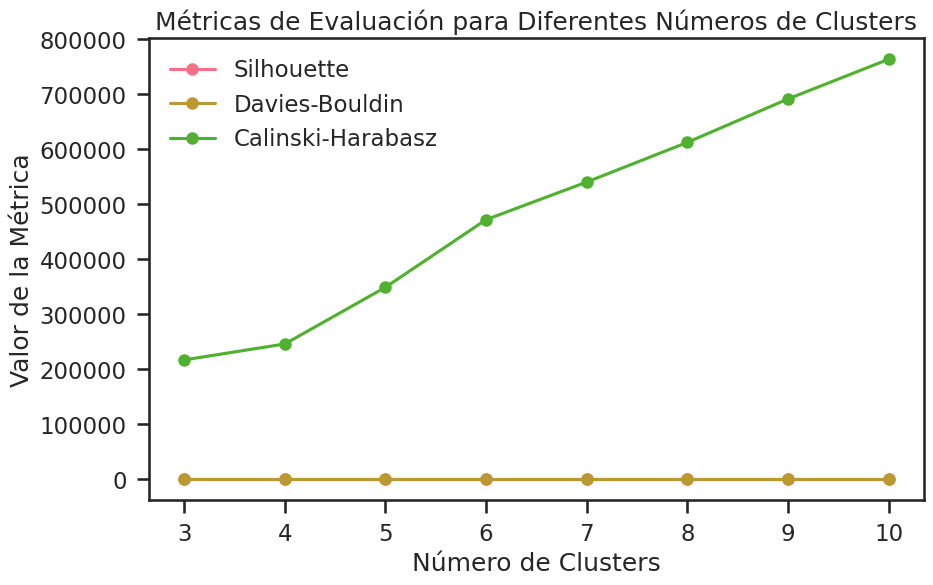

,Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.629119,0.530909,216993.342535
1,4,0.597753,0.487667,246025.006842
2,5,0.709964,0.439129,349145.144520
3,6,0.726142,0.456725,472120.651196
4,7,0.744802,0.413831,540572.278421
5,8,0.759026,0.380366,612778.815397
6,9,0.707946,0.415769,691750.137958
7,10,0.678614,0.460745,763966.770666


In [38]:
# Almacenar resultados en una lista
results = []

# Iterar sobre diferentes números de clusters
for n_clusters in range(3, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(df_final_encoded)
    cluster_labels = kmeans.labels_

    # Calcular métricas de evaluación
    silhouette = silhouette_score(df_final_encoded, cluster_labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(df_final_encoded, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(df_final_encoded, cluster_labels)

    # Almacenar resultados en la lista
    results.append({
        'Clusters': n_clusters,
        'Silhouette': silhouette,
        'Davies-Bouldin': davies_bouldin,
        'Calinski-Harabasz': calinski_harabasz
    })

# Construir DataFrame
df_metrics = pd.DataFrame(results)

# Visualizar métricas
plt.figure(figsize=(10, 6))
plt.plot(df_metrics['Clusters'], df_metrics['Silhouette'], marker='o', label='Silhouette')
plt.plot(df_metrics['Clusters'], df_metrics['Davies-Bouldin'], marker='o', label='Davies-Bouldin')
plt.plot(df_metrics['Clusters'], df_metrics['Calinski-Harabasz'], marker='o', label='Calinski-Harabasz')
plt.title('Métricas de Evaluación para Diferentes Números de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Valor de la Métrica')
plt.legend()
plt.show()

# Mostrar el DataFrame con las métricas
df_metrics


In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def cluster_metrics(X, n_clusters, random_state=None, max_iter=300, n_init=10):
    """
    Realiza la clusterización y calcula métricas.

    Parameters:
    - X: DataFrame o array-like, las características para clusterizar.
    - n_clusters: int, número de clusters a formar.
    - random_state: int, seed para reproducibilidad.
    - max_iter: int, número máximo de iteraciones para el algoritmo KMeans.
    - n_init: int, número de inicializaciones para el algoritmo KMeans.

    Returns:
    - silhouette: float, puntuación de silueta.
    - davies_bouldin: float, puntuación de Davies-Bouldin.
    - calinski_harabasz: float, puntuación de Calinski-Harabasz.
    - labels: array, etiquetas de cluster asignadas.
    - kmeans_model: objeto KMeans, modelo ajustado.
    """
    kmeans = KMeans(
        n_clusters=n_clusters,
        init='k-means++',
        random_state=random_state,
        max_iter=max_iter,
        n_init=n_init
    )
    labels = kmeans.fit_predict(X)

    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    return silhouette, davies_bouldin, calinski_harabasz, labels, kmeans

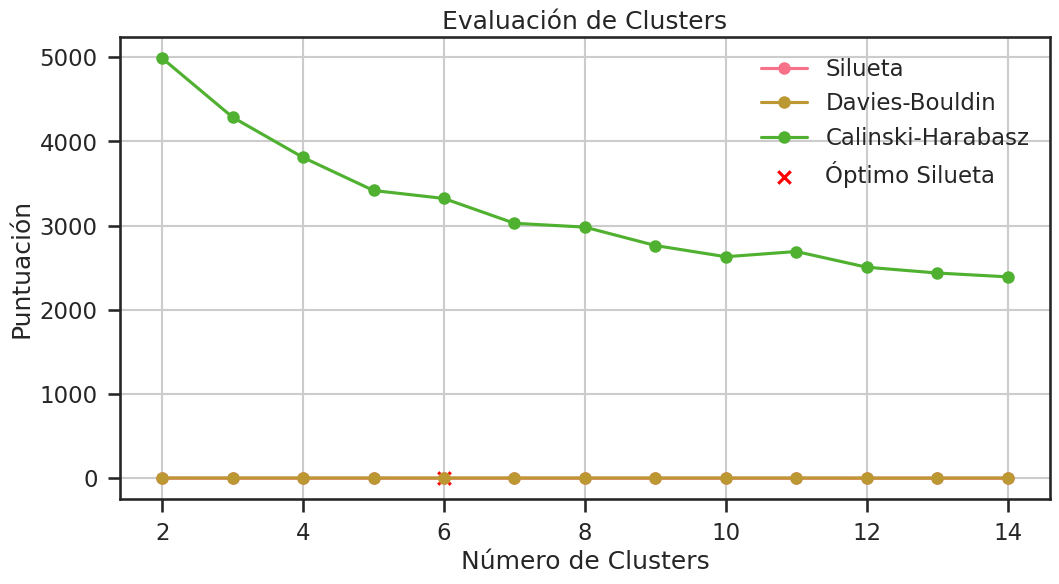

In [40]:
3# Rango de clusters
cluster_range = range(2, 15)
SEED = 42

# Resultados para cada número de clusters
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for n_clusters in cluster_range:
    silhouette, davies_bouldin, calinski_harabasz, _, _ = cluster_metrics(x_std, n_clusters, SEED)
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)
    calinski_harabasz_scores.append(calinski_harabasz)

# Visualización de métricas
plt.figure(figsize=(12, 6))

# Puntuaciones de Silueta
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silueta')
plt.title('Evaluación de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación')
plt.grid(True)
plt.legend()

# Puntuaciones de Davies-Bouldin
plt.plot(cluster_range, davies_bouldin_scores, marker='o', label='Davies-Bouldin')
plt.legend()

# Puntuaciones de Calinski-Harabasz
plt.plot(cluster_range, calinski_harabasz_scores, marker='o', label='Calinski-Harabasz')
plt.legend()

# Destacar el punto óptimo de Silueta
max_silhouette_idx = silhouette_scores.index(max(silhouette_scores))
plt.scatter(cluster_range[max_silhouette_idx], silhouette_scores[max_silhouette_idx], color='red', marker='x', label='Óptimo Silueta')
plt.legend()

plt.show()


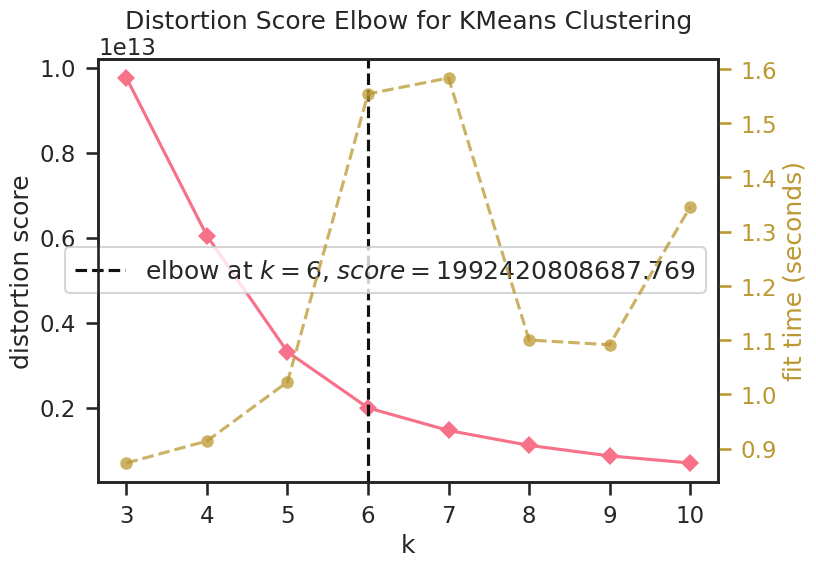

In [41]:
#Importar la visualización del codo (KElbowVisualizer) desde yellowbrick
from yellowbrick.cluster import KElbowVisualizer
import warnings

# Suprimir todas las advertencias para una salida más limpia
warnings.filterwarnings("ignore")

#Crear una instancia del modelo KMeans
model = KMeans(random_state=42)

#visualizador del codo con el modelo KMeans y se especifica el
#rango de valores para k, que va desde 3 hasta 11 clusters.
visualizer = KElbowVisualizer(model, k=(3,11))

visualizer.fit(x)
visualizer.show()
plt.show()

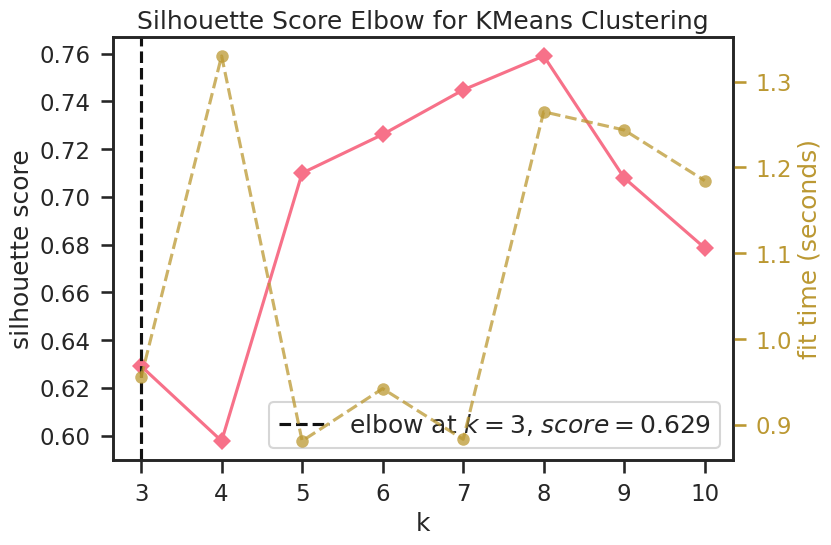

In [42]:
#Crear una instancia del modelo KMeans
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(3,11), metric='silhouette')

visualizer.fit(x)
visualizer.show()
plt.show()

Despues analizar las graficas y nuestras metricas el total de clusters ideal esta entre 3 a 6 clusters pero el numero ideal serian de 6

# **5.1  Número de clusters:**

In [46]:
#Crear una instancia del modelo KMeans y ajustar las características
Kmeans_Model = KMeans(n_clusters=6, init='k-means++')
Kmeans_Model.fit(x)

KMeans(n_clusters=6)

In [47]:
#Información de los datos
print("Número de filas: ",df_final_encoded.shape[0])
print("Número de Columnas:",df_final_encoded.shape[1])
print("Variables Categóricas: ",df_final_encoded.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_final_encoded.select_dtypes(exclude='object').shape[1])

Número de filas:  60428
Número de Columnas: 38
Variables Categóricas:  0
Variables Numéricas:  38


In [48]:
#Generamos los datos aleatorios con las dimensiones correspondiente
random_data = np.random.rand(60428,38)
random_data

array([[0.31839729, 0.84460011, 0.04600886, ..., 0.78973046, 0.09922249,
        0.3860163 ],
       [0.11063123, 0.49054698, 0.44743536, ..., 0.51794638, 0.1638947 ,
        0.33215618],
       [0.68581675, 0.37553454, 0.24590614, ..., 0.21218658, 0.48798046,
        0.13443965],
       ...,
       [0.26105745, 0.89828286, 0.90681857, ..., 0.91030444, 0.90551284,
        0.71152084],
       [0.92320076, 0.3748475 , 0.14144051, ..., 0.74202405, 0.136035  ,
        0.52611758],
       [0.20548828, 0.69837568, 0.11574751, ..., 0.36224775, 0.06044863,
        0.77074742]])

In [49]:
# Crear DataFrame vacío
df_esctructura = pd.DataFrame(columns=['Clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])

# Definir rango de clusters
min_clusters = 3
max_clusters = 12

# Iterar sobre diferentes números de clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    # Instanciar el modelo de KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Ajustar el modelo a los datos aleatorios
    kmeans.fit(random_data)
    cluster_labels = kmeans.labels_

    # Calcular las métricas
    silhouette = silhouette_score(random_data, cluster_labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(random_data, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(random_data, cluster_labels)

    # Agregar los resultados al DataFrame
    df_esctructura = df_esctructura.append({'Clusters': n_clusters,
                                    'Silhouette': silhouette,
                                    'Davies-Bouldin': davies_bouldin,
                                    'Calinski-Harabasz': calinski_harabasz},
                                    ignore_index=True)

# Mostrar el DataFrame con los resultados
df_esctructura


,Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3.0,0.016250,6.380732,1001.895971
1,4.0,0.016855,5.937776,878.057193
2,5.0,0.015530,5.621071,779.501428
3,6.0,0.015129,5.461795,708.030833
4,7.0,0.014946,5.318842,653.702441
5,8.0,0.014801,5.115329,609.856678
6,9.0,0.014828,4.957051,574.603623
7,10.0,0.014770,4.855860,542.461041
8,11.0,0.014914,4.713664,518.017646
9,12.0,0.014757,4.630827,491.408204


*Observamos* que los resultados de la validación de la variable `'random_data'` que tomamos como baseline, los resultados no se acercan a lo que esperamos para nuestro analisis


#5.2 Evaluacion



Para evaluar la estabilidad de los clusters:

  Divide X_std en 3 o 5 partes iguales utilizando numpy.array_split() y almacena cada fragmento en variables llamadas set_1, set_2, ..., set_n.
  Repite los pasos de validación (clustering con KMeans, métricas de evaluación) para cada conjunto (set_1, set_2, ..., set_n) utilizando el número de clusters seleccionado en el paso anterior.
  Calcula las métricas de evaluación para cada conjunto y compara los puntajes. Verifica que los puntajes no presenten una variación mayor al ±5% entre sí.

Este proceso garantizará que hay homogeneidad en la composición de los clusters entre los diferentes conjuntos. Si los puntajes no presentan una variación mayor al ±5%, se puede considerar que los clusters son estables.


In [50]:
def split_dataframe(df, num_splits):
    rows_per_set = len(df) // num_splits  # Calcula el número de filas por conjunto
    sets = np.array_split(df, num_splits)  # Divide el DataFrame en 'num_splits' conjuntos
    return sets

# Uso de la función
num_splits = 3  # Número de conjuntos deseados
sets = split_dataframe(df_final_encoded, num_splits)

# Nombramos cada conjunto
set_1, set_2, set_3 = sets[0], sets[1], sets[2]

Evaluaremos la estabilidad del cluster con esta división de 3 partes iguales

In [51]:
# Creamos un DataFrame para almacenar los resultados
df_set_1 = pd.DataFrame(columns=['Clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])

# Definir el rango de clusters
cluster_range = range(3, 9)

# Iterar sobre los clusters
for n_clusters in cluster_range:
    # Instanciar y entrenar el modelo de KMeans
    kmeans_set_1 = KMeans(n_clusters=n_clusters, random_state=42)
    labels_set_1 = kmeans_set_1.fit_predict(set_1)

    # Calcular las métricas para el set actual
    silhouette_set_1 = silhouette_score(set_1, labels_set_1, metric='euclidean')
    davies_bouldin_set_1 = davies_bouldin_score(set_1, labels_set_1)
    calinski_harabasz_set_1 = calinski_harabasz_score(set_1, labels_set_1)

    # Agregar los resultados al DataFrame
    df_set_1 = df_set_1.append({'Clusters': n_clusters,
                                'Silhouette': silhouette_set_1,
                                'Davies-Bouldin': davies_bouldin_set_1,
                                'Calinski-Harabasz': calinski_harabasz_set_1},
                               ignore_index=True)

# Imprimir el DataFrame final
df_set_1


,Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3.0,0.629391,0.529820,72059.914459
1,4.0,0.598039,0.486116,81906.651945
2,5.0,0.711515,0.436218,117455.794169
3,6.0,0.727768,0.454487,158427.978528
4,7.0,0.745953,0.411013,180797.332504
5,8.0,0.760095,0.376061,204687.515127


In [52]:
# Crear un DataFrame para almacenar los resultados
df_set_2 = pd.DataFrame(columns=['Clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])

# Definir el rango de clusters
cluster_range = range(3, 9)

# Iterar sobre los clusters
for n_clusters in cluster_range:
    # Instanciar y entrenar el modelo de KMeans
    kmeans_set_2 = KMeans(n_clusters=n_clusters, random_state=42)
    labels_set_2 = kmeans_set_2.fit_predict(set_2)

    # Calcular las métricas para el set actual
    silhouette_set_2 = silhouette_score(set_2, labels_set_2, metric='euclidean')
    davies_bouldin_set_2 = davies_bouldin_score(set_2, labels_set_2)
    calinski_harabasz_set_2 = calinski_harabasz_score(set_2, labels_set_2)

    # Agregar los resultados al DataFrame
    df_set_2 = df_set_2.append({'Clusters': n_clusters,
                                'Silhouette': silhouette_set_2,
                                'Davies-Bouldin': davies_bouldin_set_2,
                                'Calinski-Harabasz': calinski_harabasz_set_2},
                               ignore_index=True)

# Imprimir el DataFrame final
df_set_2

,Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3.0,0.628737,0.531100,71211.972594
1,4.0,0.598023,0.489376,81108.303031
2,5.0,0.708500,0.441612,114320.281369
3,6.0,0.725263,0.458242,155280.019333
4,7.0,0.744738,0.415167,179008.997765
5,8.0,0.758675,0.380200,201738.387292


In [53]:
# Crear un DataFrame para almacenar los resultados
df_set_3 = pd.DataFrame(columns=['Clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])

# Definir el rango de clusters
cluster_range = range(3, 9)

# Iterar sobre los clusters
for n_clusters in cluster_range:
    # Instanciar y entrenar el modelo de KMeans
    kmeans_set_3 = KMeans(n_clusters=n_clusters, random_state=42)
    labels_set_3 = kmeans_set_3.fit_predict(set_3)

    # Calcular las métricas para el set actual
    silhouette_set_3 = silhouette_score(set_3, labels_set_3, metric='euclidean')
    davies_bouldin_set_3 = davies_bouldin_score(set_3, labels_set_3)
    calinski_harabasz_set_3 = calinski_harabasz_score(set_3, labels_set_3)

    # Agregar los resultados al DataFrame
    df_set_3 = df_set_3.append({'Clusters': n_clusters,
                                'Silhouette': silhouette_set_3,
                                'Davies-Bouldin': davies_bouldin_set_3,
                                'Calinski-Harabasz': calinski_harabasz_set_3},
                               ignore_index=True)

# Imprimir el DataFrame final
df_set_3

,Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3.0,0.629199,0.531748,73715.351198
1,4.0,0.597151,0.487491,82982.593653
2,5.0,0.709836,0.439585,117372.094821
3,6.0,0.725353,0.457364,158364.398052
4,7.0,0.743674,0.415099,180700.348245
5,8.0,0.758260,0.384712,206267.534929


In [54]:
def comparar_diferencias(df1, df2, columns_to_compare,):
    diferencias = {}
    for column in columns_to_compare:
        if column in df1.columns and column in df2.columns:
            dif_percentage = abs((df1[column] - df2[column]) / df1[column]*100)
            diferencias[column] = dif_percentage

    return diferencias

# Columnas a comparar
columns_to_compare = ['Clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']

# Vemos las diferencias entre el set_1 y el set_2
dif_1_2_values = comparar_diferencias(df_set_1, df_set_2, columns_to_compare)

#  Vemos las diferencias entre el set_1 y el set_3
dif_1_3_values = comparar_diferencias(df_set_1, df_set_3, columns_to_compare)

#  Vemos las diferencias entre el set_2 y el set_3
dif_2_3_values = comparar_diferencias(df_set_2, df_set_3, columns_to_compare)


# Creamos una función para determinar las diferencias entre los valores de cada partición
def print_differences(differences, tolerancia):
    for column, diff in differences.items():
        if diff.any() > tolerancia:
            print(f"Difference in {column}:")
            print(diff)

# Imprimimos las diferencias entre el set_1 vs set_2
dif_1_2_values

# Imprimimos las diferencias entre el set_1 vs set_3
dif_1_3_values

# Imprimimos las diferencias entre el set_1 vs set_3
dif_2_3_values

{'Clusters': 0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 5    0.0
 Name: Clusters, dtype: float64,
 'Silhouette': 0    0.073429
 1    0.145886
 2    0.188543
 3    0.012395
 4    0.142907
 5    0.054648
 Name: Silhouette, dtype: float64,
 'Davies-Bouldin': 0    0.121963
 1    0.385122
 2    0.459078
 3    0.191447
 4    0.016316
 5    1.186788
 Name: Davies-Bouldin, dtype: float64,
 'Calinski-Harabasz': 0    3.515390
 1    2.310849
 2    2.669529
 3    1.986333
 4    0.944841
 5    2.245060
 Name: Calinski-Harabasz, dtype: float64}

Encontrams que ninguna variación excede el 5%

In [55]:
tolerancia = 5
# validar si la diferencia entre los valores es mayor a 5% para df_set_1 y df_set_2
if any(value > tolerancia for values in dif_1_2_values.values() for value in values):
    print("Diferencias exceden 5% entre el df_set_1 y el df_set_2.")
else:
    print("Diferencias son menores o iguales al 5% entre el df_set_1 y df_set_2.")

# validar si la diferencia entre df_set_1 y df_set_3 excede la tolerancia
if any(value > tolerancia for values in dif_1_3_values.values() for value in values):
    print("Diferencias exceden 5% entre el df_set_1 y el df_set_3.")
else:
    print("Diferencias son menores o iguales al 5% entre el df_set_1 y df_set_3.")

# validar si la diferencia entre df_set_2 y df_set_3 excede la tolerancia
if any(value > tolerancia for values in dif_2_3_values.values() for value in values):
    print("Diferencias exceden 5% entre el df_set_2 y el df_set_3.")
else:
    print("Diferencias son menores o iguales al 5% entre el df_set_2 y df_set_3.")


Diferencias son menores o iguales al 5% entre el df_set_1 y df_set_2.
Diferencias son menores o iguales al 5% entre el df_set_1 y df_set_3.
Diferencias son menores o iguales al 5% entre el df_set_2 y df_set_3.


# Instanciar los clusters

In [56]:
# DataFrame de entrada
datos = df_final_encoded

# Instanciar KMeans con n_clusters=6
kmeans = KMeans(n_clusters=6, random_state=42)

# Ajustar KMeans a tus datos y obtener las etiquetas de clúster
datos['cluster'] = kmeans.fit_predict(datos)


In [57]:
datos.head()

,ventas_tienda,ingreso_anual,numero_hijos,precio_recomendado,peso_neto,pies_cuadrados_comestibles,pies_cuadrados_congelados,empaque_reciclable,bajo_en_grasa,unidades_por_caja,cafeteria,tienda_de_videos,comida_preparada,floristeria,tipo_Bebida,tipo_Comida,tipo_No comestible,genero_Femenino,genero_Masculino,miembro_Bronce,miembro_Normal,miembro_Oro,miembro_Plata,estado_civil_Casado,estado_civil_Soltero,pais_Canadá,pais_Estados Unidos,pais_México,ocupacion_Cargo de Oficina,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico,escolaridad_Maestría,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico,cluster
0,7.36,20000,1.0,1.84,17.70,18670.0,5415.0,1.0,0.0,17.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4
1,5.52,60000,0.0,1.84,17.70,18670.0,5415.0,1.0,0.0,17.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,3.68,20000,0.0,1.84,17.70,18670.0,5415.0,1.0,0.0,17.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
3,3.68,40000,2.0,1.84,17.70,18670.0,5415.0,1.0,0.0,17.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,4.08,40000,0.0,1.36,5.11,18670.0,5415.0,0.0,1.0,29.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2


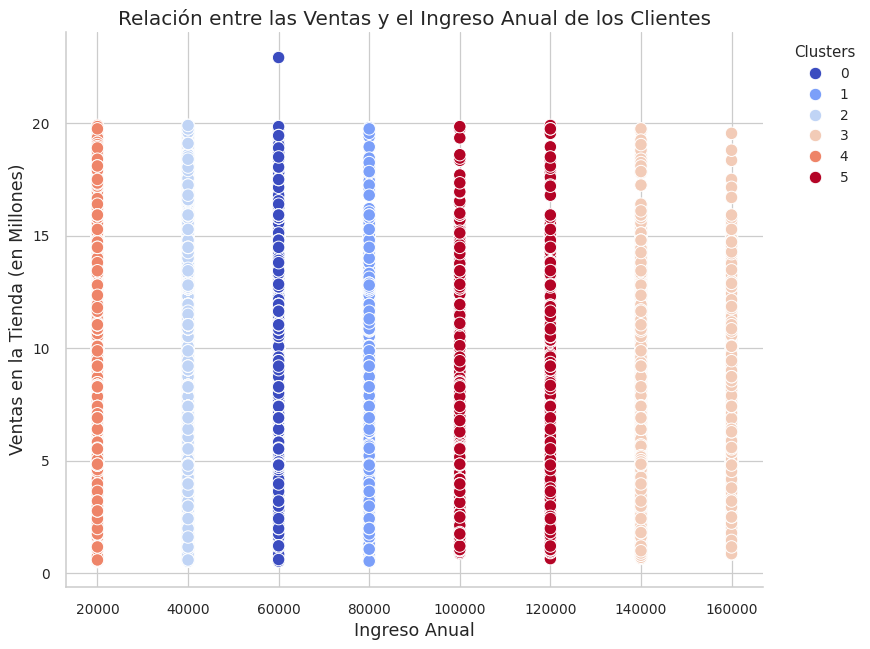

In [58]:
# Establecemos el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos, x='ingreso_anual', y='ventas_tienda', hue='cluster', palette='coolwarm', s=100)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y el Ingreso Anual de los Clientes", fontsize=16)
plt.xlabel("Ingreso Anual", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones)", fontsize=14)

# Añadir leyenda
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Ajustar diseño
sns.despine()

# Mostrar el gráfico
plt.show()


en este grafico vemos que en el cluster 0 están las personas con un promedio de ingreso anual de USD 60.000, en el cluster 1 las que tienen USD 80.000 en promedio de ingreso anual, en el cluster 2 las de USD 40.000, en el cluster 3 están los que tienen ingreso más alto entre USD 140.000 y USD 160.000, en el cluster 4 los que tienen menor ingreso entre USD 20.000, y finalmente en el cluster 5 están los que tienen un ingreso promedio anual entre USD 100.000 y USD 120.000.




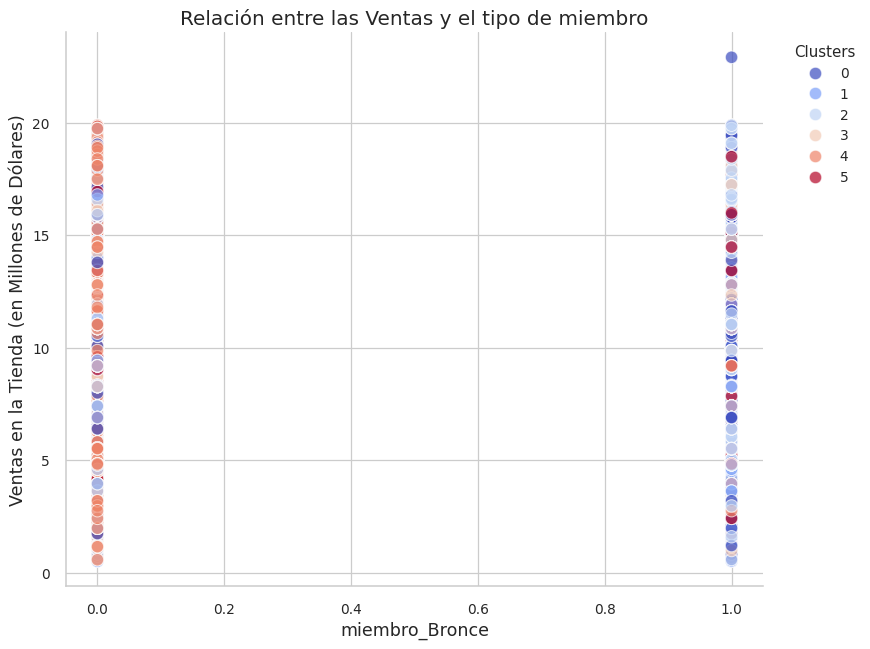

In [59]:
# Establecer el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos, x='miembro_Bronce', y='ventas_tienda', hue='cluster', palette='coolwarm', s=100, edgecolor='w', alpha=0.7)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y el tipo de miembro", fontsize=16)
plt.xlabel("miembro_Bronce", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones de Dólares)", fontsize=14)

# Añadir leyenda con título personalizado
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Ajustar diseño
sns.despine()

# Mostrar el gráfico
plt.show()


en este segundo grafico logramos identificar que para los clientes bronce el cluster fuerte esta en el rango del 3 al 4

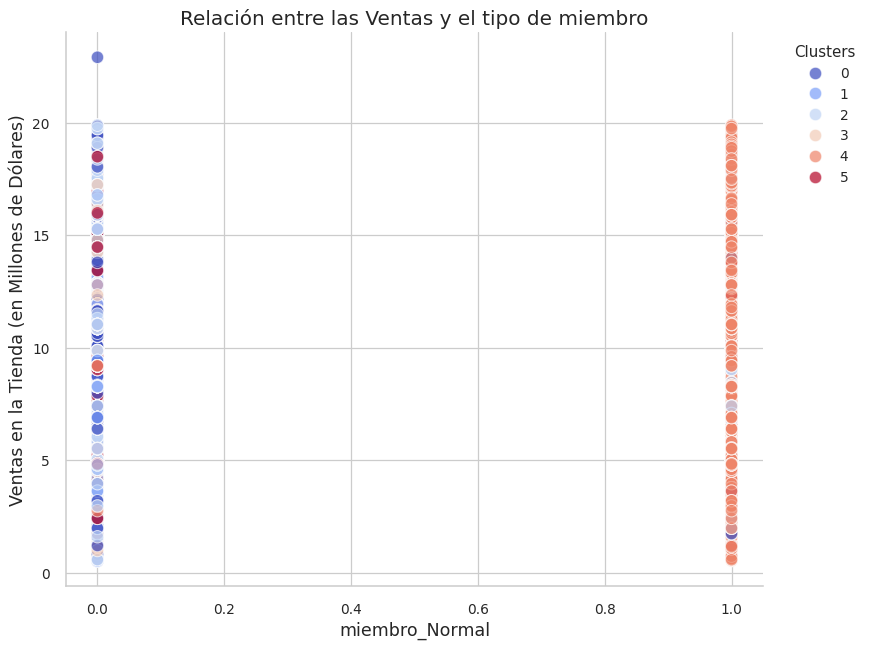

In [60]:
# Establecer el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos, x='miembro_Normal', y='ventas_tienda', hue='cluster', palette='coolwarm', s=100, edgecolor='w', alpha=0.7)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y el tipo de miembro", fontsize=16)
plt.xlabel("miembro_Normal", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones de Dólares)", fontsize=14)

# Añadir leyenda con título personalizado
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Ajustar diseño
sns.despine()

# Mostrar el gráfico
plt.show()


para el 3 grafico encontramos que para ls miembros normales se encuentra una fuerte relacion entre el cluster 4 y 5 lo cual nos permite observar que la estrategia es crear una manera que los clientes normales pasen a ser algun tipo de categoria

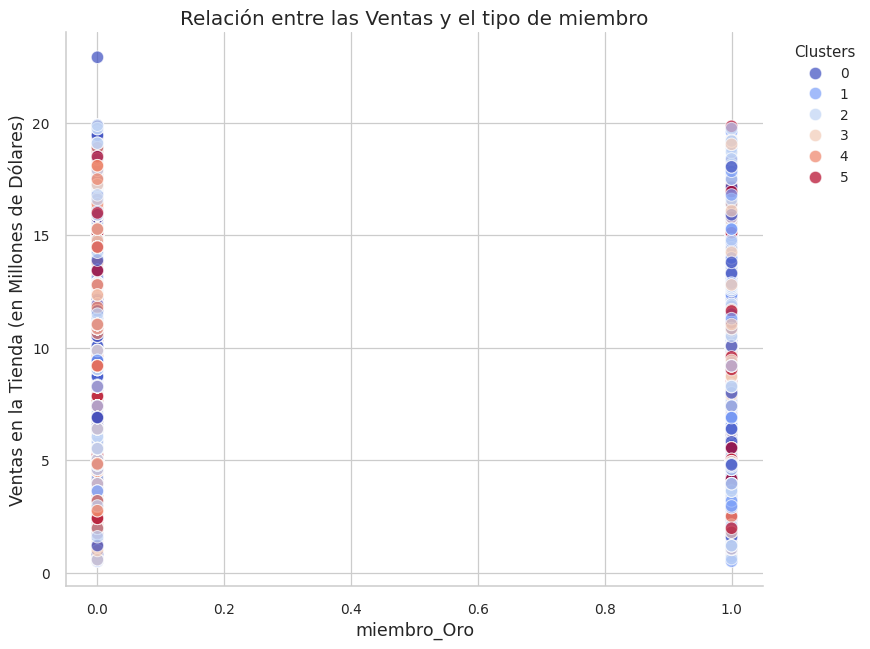

In [62]:
# Establecer el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos, x='miembro_Oro', y='ventas_tienda', hue='cluster', palette='coolwarm', s=100, edgecolor='w', alpha=0.7)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y el tipo de miembro", fontsize=16)
plt.xlabel("miembro_Oro", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones de Dólares)", fontsize=14)

# Añadir leyenda con título personalizado
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Ajustar diseño
sns.despine()

# Mostrar el gráfico
plt.show()

para los miembros de oro el cluster fuerte esta entre el 1 y el 2

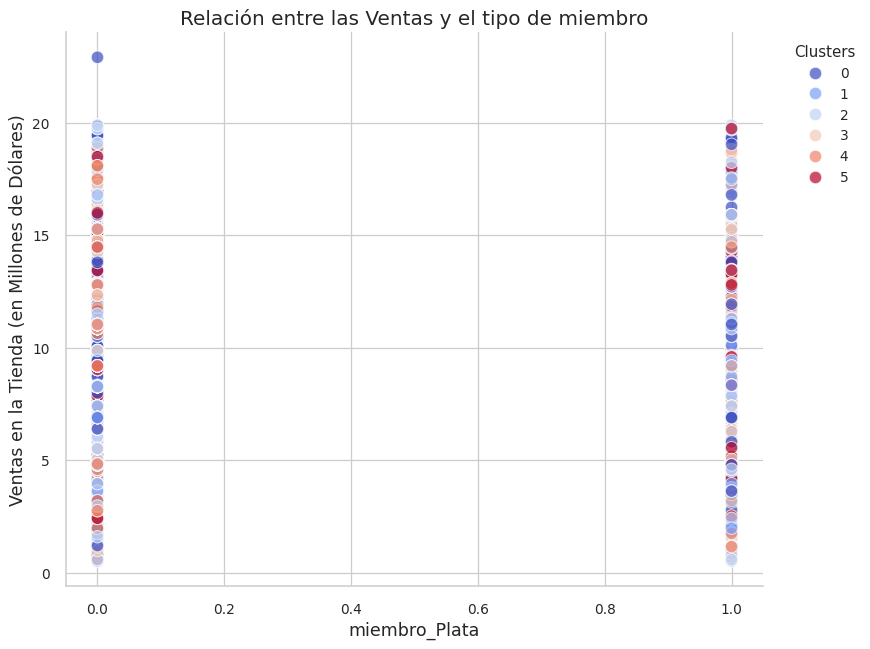

In [64]:
# Establecer el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos, x='miembro_Plata', y='ventas_tienda', hue='cluster', palette='coolwarm', s=100, edgecolor='w', alpha=0.7)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y el tipo de miembro", fontsize=16)
plt.xlabel("miembro_Plata", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones de Dólares)", fontsize=14)

# Añadir leyenda con título personalizado
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Ajustar diseño
sns.despine()

# Mostrar el gráfico
plt.show()

para los miembros de plata el cluster fuerte esta entre el 1 y el 2

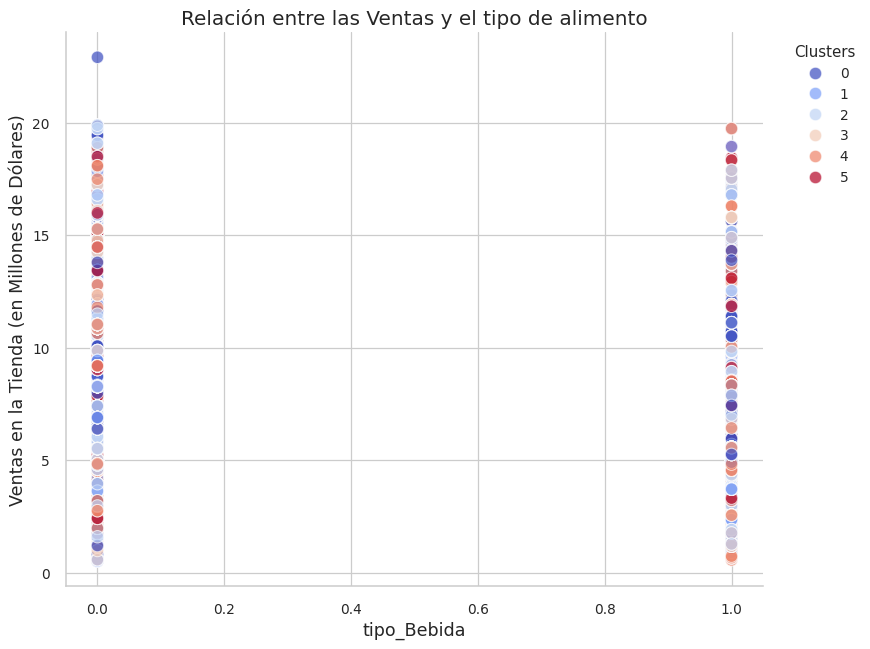

In [65]:
# Establecer el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos, x='tipo_Bebida', y='ventas_tienda', hue='cluster', palette='coolwarm', s=100, edgecolor='w', alpha=0.7)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y el tipo de alimento", fontsize=16)
plt.xlabel("tipo_Bebida", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones de Dólares)", fontsize=14)

# Añadir leyenda con título personalizado
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Ajustar diseño
sns.despine()

# Mostrar el gráfico
plt.show()

En este grafico por tipo de alimento identificamos que los clusters se dispersan pero vemos una fuerte acción en los clusters del 1 al 3

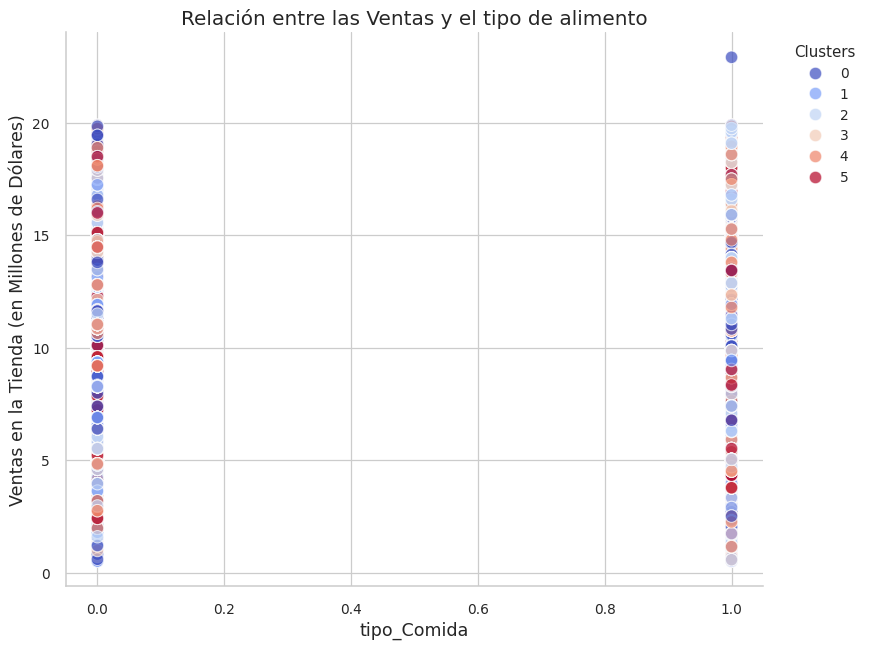

In [69]:
# Establecer el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos, x='tipo_Comida', y='ventas_tienda', hue='cluster', palette='coolwarm', s=100, edgecolor='w', alpha=0.7)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y el tipo de alimento", fontsize=16)
plt.xlabel("tipo_Comida", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones de Dólares)", fontsize=14)

# Añadir leyenda con título personalizado
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Ajustar diseño
sns.despine()

# Mostrar el gráfico
plt.show()

En este grafico por tipo de comida  identificamos que los clusters se dispersan pero vemos una fuerte acción en los clusters del 1

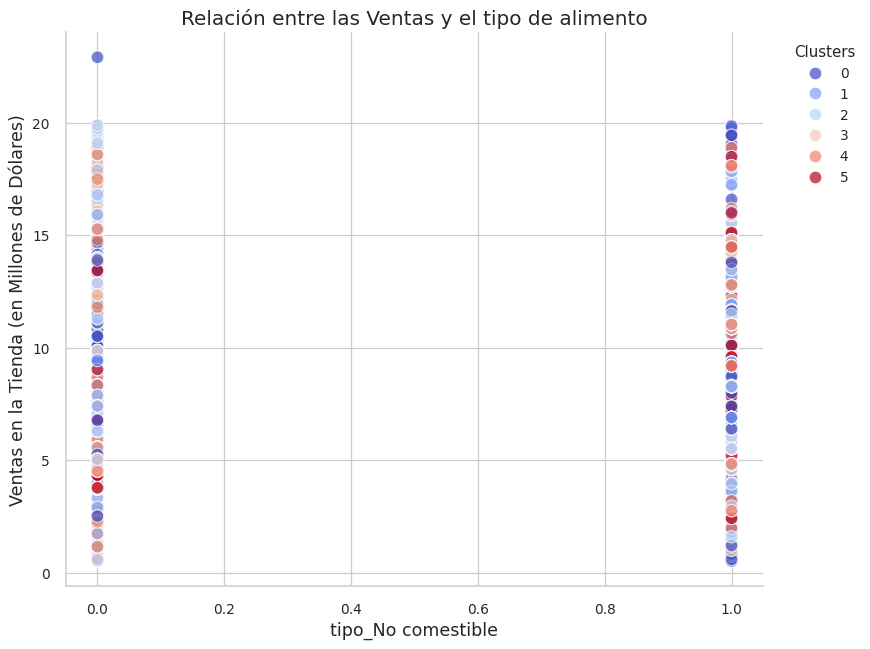

In [67]:
# Establecer el estilo del gráfico
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8), dpi=90)

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=datos, x='tipo_No comestible', y='ventas_tienda', hue='cluster', palette='coolwarm', s=100, edgecolor='w', alpha=0.7)

# Personalizar ejes y título
plt.title("Relación entre las Ventas y el tipo de alimento", fontsize=16)
plt.xlabel("tipo_No comestible", fontsize=14)
plt.ylabel("Ventas en la Tienda (en Millones de Dólares)", fontsize=14)

# Añadir leyenda con título personalizado
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

# Ajustar diseño
sns.despine()

# Mostrar el gráfico
plt.show()

En este grafico por tipo de alimento no comestible  identificamos que los clusters se dispersan pero vemos una fuerte acción en los clusters del 1 al 3

#**Concluciones**

A partir de la observación de los tres últimos gráficos en relación con el tipo de producto, se pueden identificar las siguientes tendencias de consumo para cada clúster:

**Cluster 0:** Mostró una inclinación a adquirir más productos del tipo 'bebida' y una ligera preferencia por productos 'no comestibles'.

**Cluster 1:** Presenta un equilibrio en el consumo de productos 'bebida', tiende a evitar productos 'comida' y muestra una propensión a comprar más productos 'no comestibles'.

**Cluster 2:** Se caracteriza por una tendencia a adquirir más productos 'comida', mantiene un equilibrio en el consumo de productos 'bebida' y muestra una menor preferencia por productos 'no comestibles'.

**Cluster 3:** Muestra una preferencia por productos 'comida' sobre 'bebida' y 'no comestibles'.

**Cluster 4:** Mantiene un equilibrio en el consumo de los tres tipos de productos.

**Cluster 5:** Tiende a adquirir más productos 'comida' y 'no comestibles'.




**Descripción de los clusters**

Cluster 0:
Este grupo está compuesto por clientes con ingresos medios, aproximadamente $60,000 anuales, y en su mayoría cuentan con educación universitaria. Se destacan por su preferencia hacia productos tipo_bebida y, en menor medida, productos_no comestibles. Además, son parte del grupo de clientes tipo plata y oro.

Estrategia a seguir: Para atraer a este segmento, se sugiere implementar estrategias como descuentos especiales en productos comestibles durante uno o dos días a la semana. Es importante destacar que, al ser consumidores con ingresos medios, buscan no solo precios competitivos, sino también productos de calidad y variedad. Por lo tanto, mantener un estricto control de calidad en los productos es esencial.

Cluster 1:
Este grupo representa a clientes con ingresos medios, alrededor de $80,000 anuales, y en su mayoría cuentan con educación universitaria o incluso de nivel maestría. Se caracterizan por preferir productos no_comestibles. Además, son parte del grupo de clientes tipo plata y oro.

Estrategia a seguir: La estrategia recomendada para este segmento es similar a la del Cluster 0. Pueden implementarse días de descuento especial para productos tipo_bebida y tipo_comida, y publicitar estos descuentos a través de correos electrónicos o medios de difusión masiva como radio o TV.

Cluster 2:
Este cluster agrupa a clientes con ingresos inferiores al promedio, alrededor de $40,000 anuales, que ocupan principalmente cargos de oficina y tienen educación técnica. Se inclinan por adquirir más productos tipo_comida. Además, son parte del grupo de clientes tipo plata y oro.

Estrategia a seguir: Dada la importancia del precio para este grupo, la estrategia debe centrarse en ofrecer precios competitivos. Se recomienda realizar una investigación para identificar los productos tipo_bebida y tipo_comida con los precios más competitivos y promocionarlos mediante anuncios en la entrada de las tiendas y a través de correos electrónicos.

Cluster 3:
Este segmento está compuesto por clientes con ingresos más elevados, oscilando entre USD 140,000 y USD 160,000 anuales, y cuentan con educación de nivel maestría. Muestran una preferencia por productos tipo_comida. En este cluster, los miembros suelen ser considerados como clientes normales, sin ninguna forma de fidelización con la tienda.

Estrategia a seguir: Dado el alto poder adquisitivo de este grupo, la estrategia debe centrarse en ofrecer productos de alta calidad. Se sugiere introducir productos gourmet y orgánicos en la categoría tipo_comida. Para las bebidas, considerar la creación de una sección VIP en cada tienda con variedades de marcas premium y ofrecerles una suscripción tipo oro que incluya descuentos y productos premium para darles esa exclusividad.

Cluster 4:
Este grupo está conformado por clientes con ingresos más bajos, alrededor de USD 20,000 anuales, y en su mayoría cuentan con educación primaria. Se destaca por mantener un equilibrio en el consumo de los tres tipos de productos. Además, se encuentran entre los miembros normales y bronce.

Estrategia a seguir: Dado el perfil similar al Cluster 2, donde el precio es crucial, la estrategia debe enfocarse en promocionar productos con los mejores precios del mercado. La publicidad en la entrada de la tienda y en medios de difusión masiva será fundamental para llegar a este segmento.

Cluster 5:
Este cluster engloba a clientes con ingresos anuales promedio elevados, entre USD 100,000 y USD 120,000, y cuentan con educación de nivel maestría. Muestran una preferencia por productos tipo_comida y tipo_no comestibles.

Estrategia a seguir: Similar al Cluster 3, este segmento pertenece al estrato de ingresos altos. La estrategia debe enfocarse en ofrecer productos de alta calidad en la categoría tipo_bebidas y considerar beneficios adicionales para estos clientes VIP. La comunicación efectiva de estas ofertas puede llevarse a cabo a través de canales exclusivos y personalizados.